## UNSUPERVISED MACHINE LEARNING APPROACHES FOR MULTIVARIATE TIME SERIES ANOMALY DECTECTION

In this project, we use unsupervised machine learing alogrithims to detect anomalous points and predict anomalies before they arise

## End to End Project Approach 
1. Collecting Data 
2. Preparing Data 
    - Check if data set is labelled or not 
        if labled -- drop the labels 
        else proceed to next phase 
    - Check for NANS 
        if NANS exist - drop them 
        else proceed to next phase 
    - Standardizing Data 
         - if Deep learning approach used: standardize else proceed to next phase 
3. Modeling 
     - 2 Models will Detect anomalies in the whole data set 
     - 1 Model will detect anoamlies ina portion of the data set and use that to predict anoamalies in the rest of the data set 
4. Evaluation
     - Exploring how does the number of outliers change as we vary the contamination hyperparamter in Isolation Forest and Local Outlier Factor 
     - Can we determine how "accurate" our Isolation Forest and Local Outlier Factor Model  is by feeding it labeled data and seeing True Positive, True Negative, False Positive, False Negative Results
5. Deployment

In [2]:
pip install ipynb

Note: you may need to restart the kernel to use updated packages.


### Importing Packages

In [1]:
#Standard imports 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import StandardScaler 

from datetime import datetime

import tensorflow as tf 

from tensorflow import keras 
import matplotlib.dates 
import datetime



from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from statsmodels.tsa.seasonal import seasonal_decompose
from keras import Model

from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score #specificity
from sklearn.metrics import recall_score #sensitivity

In [2]:
# External Functions necessary for the rest of the pipeline 

from ipynb.fs.full.unsupervised_preprocess import clean, load_df
from ipynb.fs.full.unsupervised_models import *
from ipynb.fs.full.unsupervised_viz import *
from ipynb.fs.full.datapipelines import *

### 1. Loading and Cleaning the Data Set
The original data set contains a device column and seven measurements taken by each of the three devices. We modified the data set to list the device numbers as columns, and used only one measurement value, carbon monoxide. Cleaning was done in unsupervised_clean.py

In [3]:
#df = pd.read_csv("iot_telemetry.csv")
df = pd.read_csv("C:/users/sneeg/desktop/mareana/iot_telemetry_data.csv")
model_df = clean(df)

In [4]:
model_df

device,1,2,3
0,0.000000,0.000000,0.004956
1,0.002840,0.000000,0.000000
2,0.000000,0.000000,0.004976
3,0.000000,0.004403,0.000000
4,0.000000,0.000000,0.004967
...,...,...,...
405179,0.003745,0.000000,0.000000
405180,0.000000,0.000000,0.005882
405181,0.000000,0.004540,0.000000
405182,0.003745,0.000000,0.000000


### 2. Data Vizualizations - Preliminary Glance at the Data

**need to fill this out

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   ts         405184 non-null  float64       
 1   device     405184 non-null  object        
 2   co         405184 non-null  float64       
 3   humidity   405184 non-null  float64       
 4   light      405184 non-null  bool          
 5   lpg        405184 non-null  float64       
 6   motion     405184 non-null  bool          
 7   smoke      405184 non-null  float64       
 8   temp       405184 non-null  float64       
 9   timestamp  405184 non-null  datetime64[ns]
dtypes: bool(2), datetime64[ns](1), float64(6), object(1)
memory usage: 25.5+ MB


### 3. Unsupervised Learning
   
   Scripts are included in unsupervised_model.py, unsupervised_viz.py. We bring necessary methods in this file to run. 
   
   Models: 

    - Tree Based Isolation Forest
    - Cluster Based Local Outlier Factor 
    - Deep Learning Based LSTM Autoencoder

In [35]:
#Isolation Forest Model 

#CONTAMINATION HYPERPARAMETER
contamination = [0.01, 0.02, 0.05, 0.1]

#STORING DATA FRAMES FOR EACH HYPERPARAMTER IN A LIST 

IF_DataFrames = []


for val in contamination: 
    #print("Contamination :", val)
    model_df = isolation_forest(model_df, val)
    #print("Data",model_df)
    IF_DataFrames.append(model_df)
    model_df = model_df.drop(['anomaly','scores','contamination'], axis = 1)
   

Contamination : 0.01
Data device         1         2         3    scores  anomaly  contamination
0       0.000000  0.000000  0.004956  0.241790        1           0.01
1       0.002840  0.000000  0.000000  0.248122        1           0.01
2       0.000000  0.000000  0.004976  0.257394        1           0.01
3       0.000000  0.004403  0.000000  0.185811        1           0.01
4       0.000000  0.000000  0.004967  0.248486        1           0.01
...          ...       ...       ...       ...      ...            ...
405179  0.003745  0.000000  0.000000  0.239602        1           0.01
405180  0.000000  0.000000  0.005882  0.266338        1           0.01
405181  0.000000  0.004540  0.000000  0.195685        1           0.01
405182  0.003745  0.000000  0.000000  0.239602        1           0.01
405183  0.000000  0.000000  0.005914  0.261905        1           0.01

[405184 rows x 6 columns]
Contamination : 0.02
Data device         1         2         3    scores  anomaly  contaminatio

In [37]:
#Local Outlier Factor Model
contamination = [0.01, 0.02, 0.05, 0.1]
#STORING DATA FRAMES FOR EACH HYPERPARAMETER IN A LIST 
LOF_DataFrames = []
for val in contamination: 
    print("Contamination :", val)
    model_df = local_outlier_factor(model_df, val)
    print("Data",model_df)
    LOF_DataFrames.append(model_df)
    model_df = model_df.drop(['anomaly', 'contamination'], axis = 1)
    


Contamination : 0.01
Data device         1         2         3  anomaly  contamination
0       0.000000  0.000000  0.004956        1           0.01
1       0.002840  0.000000  0.000000        1           0.01
2       0.000000  0.000000  0.004976        1           0.01
3       0.000000  0.004403  0.000000        1           0.01
4       0.000000  0.000000  0.004967        1           0.01
...          ...       ...       ...      ...            ...
405179  0.003745  0.000000  0.000000        1           0.01
405180  0.000000  0.000000  0.005882        1           0.01
405181  0.000000  0.004540  0.000000        1           0.01
405182  0.003745  0.000000  0.000000        1           0.01
405183  0.000000  0.000000  0.005914        1           0.01

[405184 rows x 5 columns]
Contamination : 0.02
Data device         1         2         3  anomaly  contamination
0       0.000000  0.000000  0.004956        1           0.02
1       0.002840  0.000000  0.000000        1           0.02
2     

KeyError: 'loss_mae'

<Figure size 1280x720 with 0 Axes>

In [68]:
#PERFORMING TRAIN TEST SPLIT NEEDED FOR LSTM 

train,test = train_test_split(model_df, test_size =  0.10, shuffle = False)

In [69]:
#RNN LSTM Autoencoder Model 
scaler = StandardScaler()
trainX = scaler.fit_transform(train)


testX= scaler.transform(test)

#reshpaping inputs
trainX = trainX.reshape(trainX.shape[0],1,trainX.shape[1])
testX = testX.reshape(testX.shape[0],1,testX.shape[1])

In [70]:
trainX.shape

(364665, 1, 3)

In [71]:
model = autoencoder(trainX)
model.compile(optimizer = "adam", loss = "mae")
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_16 (LSTM)               (None, 1, 25)             2900      
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                15200     
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 1, 50)             0         
_________________________________________________________________
lstm_18 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
lstm_19 (LSTM)               (None, 1, 25)             7600      
_________________________________________________________________
time_distributed_4 (TimeDist (None, 1, 3)              78        
Total params: 45,978
Trainable params: 45,978
Non-trainable params: 0
__________________________________________________

Summary of our LSTM Autoencoder Model. Implemented in unsupervised_models.py. Sequential model with 6 layers. 

In [72]:
#MODEL HISTORY 
history = model.fit(trainX, trainX, epochs = 10, batch_size= 256, validation_split= 0.1, verbose = 1, shuffle=False).history

Epoch 1/10
1283/1283 [==============================] - 16s 9ms/step - loss: 0.1193 - val_loss: 0.1097
Epoch 2/10
1283/1283 [==============================] - 11s 8ms/step - loss: 0.0333 - val_loss: 0.0925
Epoch 3/10
1283/1283 [==============================] - 9s 7ms/step - loss: 0.0256 - val_loss: 0.0775
Epoch 4/10
1283/1283 [==============================] - 9s 7ms/step - loss: 0.0205 - val_loss: 0.0679
Epoch 5/10
1283/1283 [==============================] - 9s 7ms/step - loss: 0.0178 - val_loss: 0.0641
Epoch 6/10
1283/1283 [==============================] - 9s 7ms/step - loss: 0.0161 - val_loss: 0.0551
Epoch 7/10
1283/1283 [==============================] - 10s 8ms/step - loss: 0.0143 - val_loss: 0.0517
Epoch 8/10
1283/1283 [==============================] - 10s 7ms/step - loss: 0.0139 - val_loss: 0.0404
Epoch 9/10
1283/1283 [==============================] - 11s 9ms/step - loss: 0.0120 - val_loss: 0.0432
Epoch 10/10
1283/1283 [==============================] - 11s 8ms/step - loss:

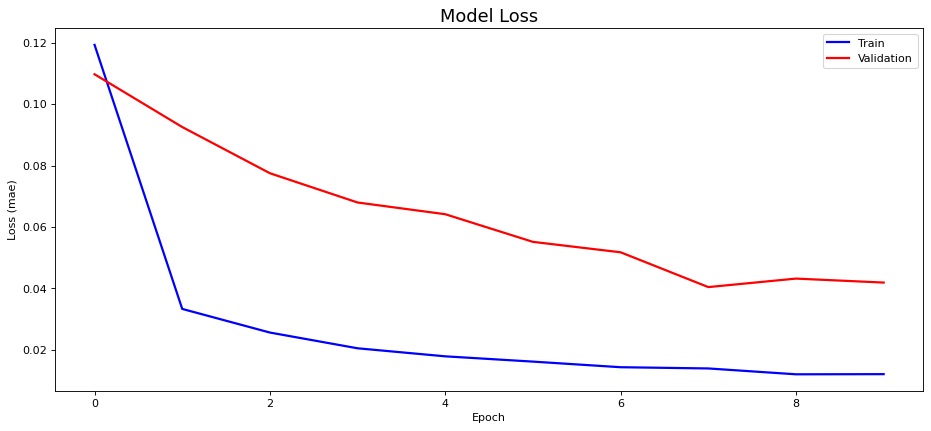

In [73]:
#MODEL LOSS CURVE 

model_loss(history)

Model Loss Curve. The loss curve is not a perfect good fit model, but it is the closest we could get with the LSTM. To achieve this, we increased our training set to 90% from the starting point of 67%. This moved our model from being underfit to good fit.

<Figure size 1280x720 with 0 Axes>

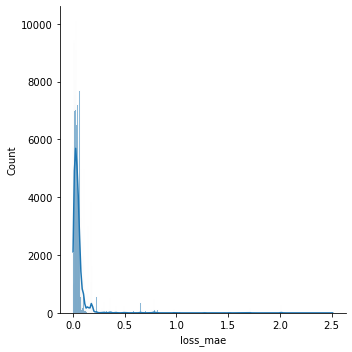

In [74]:
#PREDICTING ON TRAIN DATA, RESHAPE INPUTS
X_pred = model.predict(trainX)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns = train.columns)
X_pred.index = train.index


scored = pd.DataFrame(index = train.index)
Xtrain = trainX.reshape(trainX.shape[0], trainX.shape[2])
scored['loss_mae'] = np.mean(np.abs(X_pred- Xtrain), axis = 1) 

#VIZUALIZATION


From this plot, we determined that a threshold value for an anomaly is 0.25. 

In [75]:
#Continuing with rest of model 
X_pred = model.predict(testX)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index = test.index)

Xtest = testX.reshape(testX.shape[0], testX.shape[2])

scored['loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)

scored['threshold'] = 0.25
scored['anomaly'] = scored['loss_mae'] > scored['threshold']

X_pred_train = model.predict(trainX)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])

X_pred_train = pd.DataFrame(X_pred_train, columns = train.columns)

X_pred_train.index = train.index

scored_train= pd.DataFrame(index = train.index)

scored_train['loss_mae'] = np.mean(np.abs(X_pred_train - Xtrain), axis =1)

scored_train['threshold'] = 0.25
scored_train['anomaly']= scored_train['loss_mae'] > scored_train['threshold']

scored = pd.concat([scored_train, scored])
    

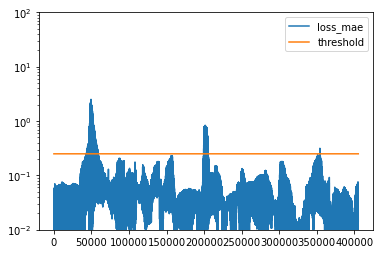

In [76]:
#PLOT THRESHOLD FOR WHAT IS CONSIDERED AN ANOMALY. 

plot_threshold(scored)

### 4. Model Evaluation: Unsupervised Learning on a Labeled Data Set 

    Here, we test the performance of the Isolation Forest and Local Outlier Factor Models by training them on the labeled pump sensor data set. We go through preprocessing and data preperation, and then fit the models on the data set. We use a a fixed contamination hyperparameter value of 0.1 As an evaluation metric, we create a confusion matrix to analyze the predicted anomalies flagged vs the actual anoamlies flagged. This gives an idea as to how accurate our unsupervised techniques are. 
  .
    
    
    

    
    
 

In [77]:
labeled_data = pd.read_csv("sensor.csv")

In [78]:
labeled_data =pump_remove_nans(labeled_data)

In [79]:
labeled_data = labeled_data.fillna(method='ffill')
labeled_data =add_prebroken(labeled_data)

In [80]:
datamat=labeled_data.iloc[:,0:labeled_data.shape[1]-2]
normdata=normalize_data(datamat)
labeled_data.iloc[:,0:labeled_data.shape[1]-2]=normdata

In [81]:
#combining anomalies, as BROKEN or RECOVERING are both anomalies compared to NORMAL
labled_data=combine_anomalies(labeled_data)
labeled_data['machine_status']=labeled_data['machine_status'].apply(lambda x: 1 if x=="NORMAL" else -1)
pcadata=pca_data(labeled_data.iloc[:,1:labeled_data.shape[1]-2],ncomps=2)
#print('Extending to include past datapoints...')
ntp=50
data=pcadata

In [82]:
#FURTHER DATA PREPERATION 
unlabeled_data  = labeled_data.drop('machine_status', axis = 1)
model_unlabeled_data = unlabeled_data.set_index("timestamp")
model_unlabeled_data = model_unlabeled_data.drop("index", axis = 1)
#model_df = isolation_forest(unlabled_data[, val)




In [83]:
IF_Unlabeled_DF = []

#ISOLATION FOREST MODEL WITH FIXED CONTAMINATION PARAMETER = 0.1
IF_Unlabeled = isolation_forest(model_unlabeled_data,0.1)
IF_Unlabeled_DF.append(IF_Unlabeled)
model_unlabeled_data = model_unlabeled_data.drop(['scores', 'anomaly', 'contamination'], axis = 1)

In [84]:
LOF_Unlabeled_DF = []

#LOCAL OUTLIER FACTOR WITH FIXED CONTAMINATION PARAMETER= 0.1 
LOF_Unlabeled = local_outlier_factor(model_unlabeled_data, vals = 0.1)


LOF_Unlabeled_DF.append(LOF_Unlabeled)
model_unlabeled_data = model_unlabeled_data.drop([ 'anomaly', 'contamination'], axis = 1)

In [90]:
#MODEL ACCURACY 

IF_Prediction = IF_Unlabeled_DF[0]['anomaly']
LOF_Prediction = LOF_Unlabeled_DF[0]['anomaly']
Data_Actual = labled_data['machine_status']



timestamp
2018-04-01 00:00:00    1
2018-04-01 00:01:00    1
2018-04-01 00:02:00    1
2018-04-01 00:03:00    1
2018-04-01 00:04:00    1
                      ..
2018-05-03 07:39:00    1
2018-05-03 07:40:00    1
2018-05-03 07:41:00    1
2018-05-03 07:42:00    1
2018-05-03 07:42:00    1
Name: anomaly, Length: 46544, dtype: int32

Confusion Matrix for Isolation Forest Model on Labeled Data Set


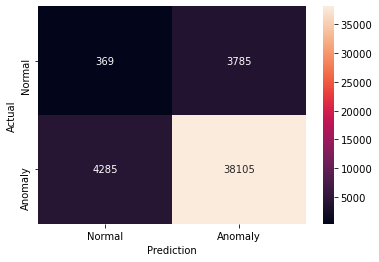

In [96]:
def plot_confusion_matrix(confusion_matrix, class_names):
    #cf_matrix = confusion_matrix(actual, prediction)
    df_cm  = pd.DataFrame(confusion_matrix, index = class_names, columns = class_names)
    
    
    sns.heatmap(df_cm, annot = True, fmt = "d")
    plt.ylabel("Actual")
    plt.xlabel("Prediction")
    
    

print("Confusion Matrix for Isolation Forest Model on Labeled Data Set")
cf_matrix = confusion_matrix(Data_Actual, IF_Prediction)
plot_confusion_matrix(cf_matrix, ["Normal", "Anomaly"])




Confusion Matrix for Local Outlier Factor Model on Labeled Data Set


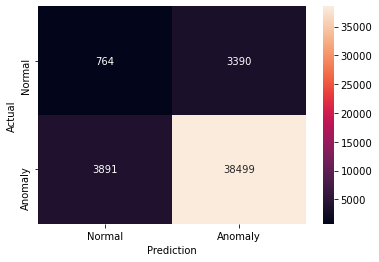

In [95]:
print("Confusion Matrix for Local Outlier Factor Model on Labeled Data Set")
cf_matrix = confusion_matrix(Data_Actual, LOF_Prediction)
plot_confusion_matrix(cf_matrix,["Normal", "Anomaly"])

The confusion matrix shows that the isolation forest model and local outlier factor model had a very high true positive rate ( actual was anomaly, prediction was anomaly), the local outlier factor model being slightly more accurate. However, there is clearly a large portion of false positives and false negatives. A possible explanation for this could be classifying "recovering" points as anomalous, leading to a discrepency between what the model views as anomalous and what the data set indicates. 